# Test

## Import and install dependencies

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

In [14]:
print("MediaPipe version:", mp.__version__)
print("Tensor version:", tf.__version__)

MediaPipe version: 0.10.10
Tensor version: 2.16.1


## Keypoints using MP holistic

In [3]:
# Just turn on the webcam

cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()
    
    # Show to screen
    cv2.imshow('OpenCV Feed', frame)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
mp_holistic = mp.solutions.holistic # holistic model (untuk deteksi)
mp_drawing = mp.solutions.drawing_utils # drawing utiities (untuk drawing)

In [5]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)   # color conversion
    image.flags.writeable = False                   # image is no longer writeable
    results = model.process(image)                  # make prediction
    image.flags.writeable = True                    # image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # color conversion
    return image, results

In [6]:
# 3: trying open webcam

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        # draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
# 4: drawing all the landmark (face, pose, hands)

def draw_landmarks(image, results):
    # Draw face connections
    # if results.face_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, 
    #         results.face_landmarks, 
    #         mp_holistic.FACEMESH_TESSELATION,
    #         landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
    #         # connection_drawing_spec=mp_drawing.DrawingSpec(color=(250,250,250), thickness=1, circle_radius=1)
    #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(250,250,250,0), thickness=1, circle_radius=1)
    #     )
    # Draw pose connections
    # if results.pose_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, 
    #         results.pose_landmarks, 
    #         mp_holistic.POSE_CONNECTIONS,
    #         landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
    #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #     )
    # Draw hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [8]:
from mediapipe.python.solutions.hands import HandLandmark
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.pose import PoseLandmark
from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
    #                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #                          ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [19]:
# 7:  open webcam + using landmark

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [20]:
# 5

draw_landmarks(frame, results)

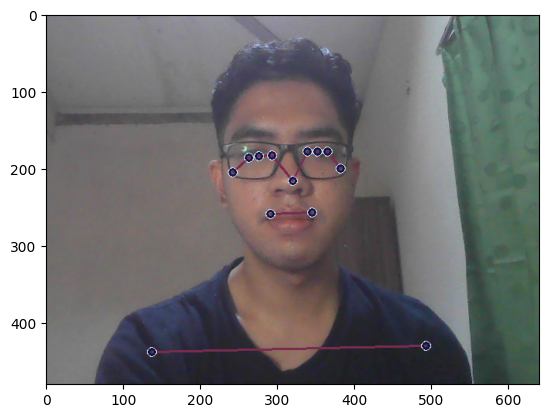

In [21]:
# 6

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract keypoint values

In [22]:
results

mediapipe.python.solution_base.SolutionOutputs

In [30]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [31]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [32]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [24]:
# 8: extracting all the landmark keypoints

def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([lh, rh])

In [25]:
result_test = extract_keypoints(results)

In [26]:
extract_keypoints(results).shape

(258,)

In [ ]:
# np.save('0', result_test)

In [ ]:
# np.load('0.npy')

## Setup Folders for collection

In [41]:
# 9: membuat folder dataset

import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'DATASET'

# Path for exported images
IMAGE_DATA_PATH = 'DATASET_IMAGE'

# Actions that we try to detect
actions = np.array(['V']) 

# Thirty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 30

# Loop through each action to create directories for both data and images
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Instead of checking existing directories, we reset sequence numbering for each action
    for sequence in range(no_sequences):  # Starts from 0 and goes up to no_sequences - 1
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)

# Folder start
start_folder = 0

## Collect Keypoint Values for Training and Testing

In [42]:
# 10: membuat dataset

import cv2
import os
import numpy as np
import mediapipe as mp

# Inisialisasi webcam capture
cap = cv2.VideoCapture(0)

# Set base directories for keypoints and images (sesuain sama nama folder masing")
DATA_PATH = 'DATASET' 
IMAGE_DATA_PATH = 'DATASET_IMAGE'

# Inisialisasi model MediaPipe Holistic dengan threshold kepercayaan
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # Terus menangkap frame hingga ditutup secara manual
        
        # Countdown sebelum pengambilan gambar dimulai
        for i in range(3, 0, -1):
            ret, frame = cap.read()
            cv2.putText(frame, f'Starting in {i}', (200, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            cv2.waitKey(1000)  # Tunggu selama 1 detik

        # Loop melalui tindakan
        for action in actions:
            # Loop melalui urutan
            for sequence in range(no_sequences):
                # Loop melalui frame dalam setiap urutan
                for frame_num in range(sequence_length):
                    # Baca frame dari feed webcam
                    ret, frame = cap.read()

                    # Lakukan deteksi menggunakan model Holistic
                    image, results = mediapipe_detection(frame, holistic)

                    # Gambar landmarks pada frame
                    draw_landmarks(image, results)

                    # Tampilkan pesan status
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING_COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                        
                        # Tampilkan ke layar
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(3000)  # Tunggu selama 3 detik

                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # Tampilkan frame dengan landmarks
                        cv2.imshow('OpenCV Feed', image)

                    # Ekstraksi keypoints dan simpan ke file NumPy array
                    keypoints = extract_keypoints(results)

                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Simpan gambar
                    img_path = os.path.join(IMAGE_DATA_PATH, action, str(sequence), f"{frame_num}.jpg")
                    cv2.imwrite(img_path, image)

                    # Break out of the loop if 'q' is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

                # Tampilkan pesan jeda sebelum mulai urutan video berikutnya
                if sequence < no_sequences - 1:
                    cv2.putText(image, 'WAITING 3 SECONDS', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)  # Tunggu selama 3 detik sebelum memulai urutan berikutnya

        # Lepaskan sumber daya webcam dan tutup jendela OpenCV
        cap.release()
        cv2.destroyAllWindows()

In [32]:
cap.release()
cv2.destroyAllWindows()

## Preprocess Data and Create Labels and Features

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
# di run waktu mau training aja

# Path for exported data, numpy arrays
DATA_PATH = 'DATASET'

# Actions that we try to detect
actions = np.array(['R', 'S', 'T', 'U', 'V'])
sequence_length = 30

In [6]:
# 11: labelling

label_map = {label:num for num, label in enumerate(actions)}

In [63]:
label_map

{'R': 0, 'S': 1, 'T': 2, 'U': 3, 'V': 4}

In [7]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [75]:
np.array(sequences).shape

(200, 30, 258)

In [51]:
np.array(labels).shape

(200,)

In [52]:
X = np.array(sequences)

In [53]:
X

array([[[ 0.51409215,  0.52833068, -0.71050292, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50703382,  0.54353833, -1.00095713, ...,  0.40479895,
          0.80150491, -0.04739197],
        [ 0.50413436,  0.54989523, -1.00019908, ...,  0.40319535,
          0.80627429, -0.0408073 ],
        ...,
        [ 0.50521529,  0.54060751, -0.9964813 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50478238,  0.54123688, -1.00674033, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50412059,  0.54086632, -1.0714736 , ...,  0.17705613,
          0.8666808 ,  0.01011705]],

       [[ 0.50412452,  0.53852618, -1.09567571, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50829947,  0.53844696, -1.04328632, ...,  0.44777441,
          0.90957582, -0.05638465],
        [ 0.51099354,  0.53778875, -1.0373708 , ...,  0.44704187,
          0.90988785, -0.04565577],
        ...,
        [ 0.49649495,  0.53632563, -0.98390913, ...,  

In [54]:
X.shape

(200, 30, 258)

In [55]:
y = to_categorical(labels).astype(int)

In [56]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [59]:
X_train.shape

(190, 30, 258)

## Build and Train LSTM Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [68]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(512, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

d:\Anaconda\envs\bangkit\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)]

In [113]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [114]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - categorical_accuracy: 0.2248 - loss: 1.6037
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - categorical_accuracy: 0.2912 - loss: 1.6141
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - categorical_accuracy: 0.3862 - loss: 1.5680
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - categorical_accuracy: 0.2703 - loss: 1.5013
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - categorical_accuracy: 0.2453 - loss: 1.3609
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - categorical_accuracy: 0.4532 - loss: 1.3132
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - categorical_accuracy: 0.4813 - loss: 1.4829
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 356ms/step - categorical_accuracy: 0.4584 - loss: 1.4719
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - categorical_accuracy: 0.4131 - loss: 1.4007
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - categorical_accuracy: 0.4069 - loss: 1.2874
Epoch 11/2000
6/6 

In [115]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 30, 64)         │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 30, 512)        │     1,181,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 256)        │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 30, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,951,569 (26.52 MB)

 Trainable params: 2,317,189 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,634,380 (17.68 MB)

## Make Predictions

In [116]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


In [117]:
actions[np.argmax(res[4])]

'S'

In [118]:
actions[np.argmax(y_test[4])]

'S'

## Save Weights

In [120]:
model.save('model_rstuv_lstm2.h5')

In [121]:
del model

In [12]:
model.load_weights('model_rstuv_lstm2.h5')

## Evaluation using Confusion Matrix and Accuracy

In [96]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [124]:
yhat = model.predict(X_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step


In [125]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [126]:
ytrue

[3,
 3,
 3,
 2,
 4,
 0,
 0,
 1,
 0,
 0,
 4,
 1,
 2,
 4,
 1,
 2,
 0,
 2,
 1,
 4,
 1,
 2,
 3,
 3,
 2,
 0,
 2,
 2,
 1,
 0,
 4,
 3,
 0,
 0,
 0,
 4,
 2,
 3,
 2,
 4,
 0,
 3,
 2,
 4,
 1,
 3,
 2,
 1,
 4,
 3,
 3,
 2,
 0,
 2,
 4,
 2,
 4,
 1,
 3,
 0,
 1,
 0,
 0,
 4,
 0,
 1,
 1,
 0,
 3,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 4,
 4,
 3,
 4,
 0,
 0,
 4,
 3,
 3,
 2,
 1,
 3,
 0,
 2,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 0,
 2,
 4,
 1,
 0,
 4,
 3,
 0,
 3,
 1,
 1,
 0,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 4,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 4,
 0,
 4,
 1,
 2,
 4,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 4,
 0,
 1,
 1,
 1,
 1,
 4,
 0,
 1,
 4,
 4,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 2,
 0,
 1,
 2,
 0,
 4,
 3,
 3,
 1,
 2,
 3,
 1,
 1,
 0,
 4,
 3,
 3,
 4,
 0,
 1,
 0,
 3,
 4,
 2,
 1]

In [ ]:
yhat

In [127]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[151,   0],
        [  0,  39]],

       [[152,   0],
        [  0,  38]],

       [[151,   0],
        [  0,  39]],

       [[153,   0],
        [  0,  37]],

       [[153,   0],
        [  0,  37]]], dtype=int64)

In [128]:
accuracy_score(ytrue, yhat)

1.0

## Test in Real Time

In [135]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [141]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)

        cv2.putText(image, ' '.join(sentence), (3,30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [134]:
cap.release()
cv2.destroyAllWindows()